# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [148]:
# Your code here.
Age = [17,51,27,21,36,48,19,26,54,30]
Tardies = [10,1,5,9,4,2,9,6,0,3]


student_data = pd.DataFrame({'X': Age, 'Y': Tardies})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

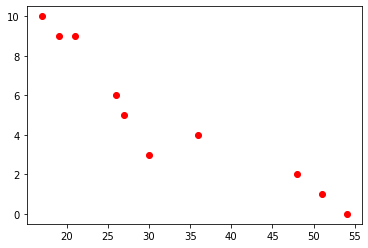

In [149]:
# Your code here.
plt.scatter(x=student_data['X'], y=student_data['Y'], color = 'r')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [150]:
# Your response here. 

print('There is clearly a strong tendency for as young as the student is the late he arrives to classes and as the age of the graphic increases the late arrivales tend to decrease and reach almost 0. It seems the teacher is right.') 

There is clearly a strong tendency for as young as the student is the late he arrives to classes and as the age of the graphic increases the late arrivales tend to decrease and reach almost 0. It seems the teacher is right.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [151]:
# Your response here.
#correlation:

print(student_data.corr())

#covariance:
print(student_data.cov())

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [152]:
# Your response here.
x = student_data['X']
y = student_data['Y']

# Let's apply the linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print ('Slope :', slope)
print('Intercept :', intercept)
print('r_value :', r_value)
print('p_value :', p_value)
print('std_err :', std_err)

Slope : -0.2428207709159808
Intercept : 12.888803363135768
r_value : -0.9391626886887121
p_value : 5.56665383455343e-05
std_err : 0.03139728816158607


Plot your regression model on your scatter plot.


Text(0, 0.5, 'tardies')

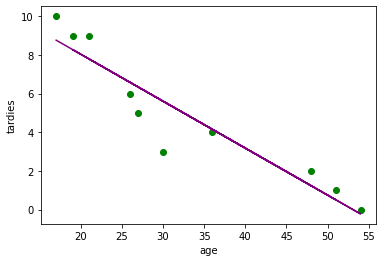

In [153]:
# Your code here.
plt.scatter(student_data.X, student_data.Y, color = 'green')
plt.plot(student_data.X, intercept + slope*student_data.X, color = 'purple')
plt.xlabel('age')
plt.ylabel('tardies')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [155]:
# Your response here. 
print("It seems the age is a good indicator of whether students tend to be late more often than others.")

It seems the age is a good indicator of whether students tend to be late more often than others.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [156]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [249]:
# Your response here. 

vehicles_2 = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

vehicles_2.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [250]:
print("The two less important variables are Year & Combined MPG.")

The two less important variables are Year & Combined MPG.


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [163]:
# Your response here. 
X = vehicles[['Engine Displacement', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles['CO2 Emission Grams/Mile']

lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)        
print("Coef: ", lm.coef_)         

predictions  = lm.predict(X)

Intercept:  899.2525055855426
Coef:  [ 7.06964426 -0.38487292 -2.00993384 18.21626583 -2.8229029   0.03675273]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [164]:
# Your response here. 
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          5.250e+06
Date:                     Sat, 30 Jan 2021   Prob (F-statistic):                        0.00
Time:                             16:28:32   Log-Likelihood:                     -1.5189e+05
No. Observations:                    35952   AIC:                                  3.038e+05
Df Residuals:                        35946   BIC:                                  3.038e+05
Df Model:                                6                                                  
Covariance Type:                 nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Engine Displacement     5.8579      0.167     35.038      0.000       5.530       6.186
Year                    0.0632      0.001     75.607      0.000       0.062       0.065
Cylinders              -2.4729      0.125    -19.834      0.000      -2.717      -2.229
Fuel Barrels/Year      19.2778      0.060    319.837      0.000      19.160      19.396
Combined MPG           -2.8721      0.043    -66.889      0.000      -2.956      -2.788
Fuel Cost/Year          0.0324      0.000     66.655      0.000       0.031       0.033
==============================================================================
Omnibus:                    70959.753   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        244268209.035
Skew:                          15.856   Prob(JB):                         0.00
Kurtosis:                     405.563   Cond. No.                     6.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
print("If I'm not mistaken and based on the variant coefficient for each unit increase of Fuel Barrels there is an increase of CO2 emissions by 19.27. Also everytime there is an engine displacement there is also an increase of 5.8 CO2 emissions. On the other side we can see that Cylinders and Combined MPG result in decrease of CO2 emissions.")

If I'm not mistaken and based on the variant coefficient for each unit increase of Fuel Barrels there is an increase of CO2 emissions by 19.27. Also everytime there is an engine displacement there is also an increase of 5.8 CO2 emissions. On the other side we can see that Cylinders and Combined MPG result in decrease of CO2 emissions.


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [243]:
# Your code here.
parties_data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
parties_data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

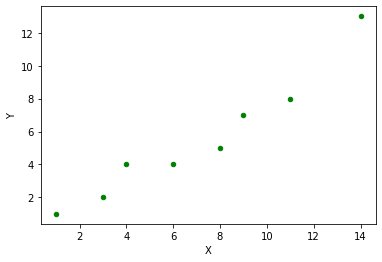

In [205]:
# Your code here.

parties_data.plot.scatter('X', 'Y', color = 'g')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [242]:
# Your response here. 
slope, intercept, r_value, p_value, std_err = stats.linregress(parties_data.X, parties_data.Y)

print("Slope: ", slope)
print("Intercept: ", intercept)
print("r_value: ", r_value)
print("p_value: ", p_value)
print("std_err: ", std_err)

print("It seems the party organizer was unprecise and there is a linear relation between the number of people invited and the people that attended the parties. The slope variant is 0.84.")

Slope:  0.8484848484848485
Intercept:  -0.43939393939393945
r_value:  0.9652303546573691
p_value:  0.00010236374464090686
std_err:  0.09380896778286217
It seems the party organizer was unprecise and there is a linear relation between the number of people invited and the people that attended the parties. The slope variant is 0.84.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Slope:  0.6832740213523132
Intercept:  0.3309608540925266
r_value:  0.9544799780350297
p_value:  0.0030609482089635864
std_err:  0.10676156583629898


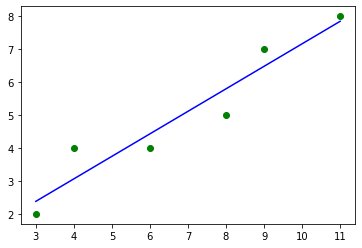

In [225]:
# Your response here. 

parties_data_2 = pd.DataFrame({'X': [3,4,6,8,9,11], 'Y': [2,4,4,5,7,8,]})
parties_data_2

slope, intercept, r_value, p_value, std_err = stats.linregress(parties_data_2.X, parties_data_2.Y)

print("Slope: ", slope)
print("Intercept: ", intercept)
print("r_value: ", r_value)
print("p_value: ", p_value)
print("std_err: ", std_err)


plt.scatter(parties_data_2.X, parties_data_2.Y, color='green')
plt.plot(parties_data_2.X, intercept + slope*parties_data_2.X, color = 'blue')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [251]:
# Your response here. 
print("The data looks more widely spread but the result seems pretty much the same. The party organizer continues to be unprecise since the information did not change that much. Without the outliers the Slope variant decreases from 0.84 to 0.68 resulting in less attendance.")

The data looks more widely spread but the result seems pretty much the same. The party organizer continues to be unprecise since the information did not change that much. Without the outliers the Slope variant decreases from 0.84 to 0.68 resulting in less attendance.
